In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("data1.csv")
data.head()

,x,y
0,17,94
1,13,73
2,12,59
3,15,80
4,16,93


In [3]:
x=data['x'].values
y=data['y'].values

In [4]:
mean_x=np.mean(x)
mean_y=np.mean(y)

numerator=np.sum((x-mean_x)*(y-mean_y))
denominator=np.sum((x-mean_x)**2)

slope=numerator/denominator
intercept=mean_y-slope*mean_x

print("Slope: ",slope)
print("Intercept: ",intercept)

Slope:  3.179245283018868
Intercept:  30.10377358490566


In [10]:
from math import sqrt
predict=slope*x+intercept

rmse=sqrt(np.mean((y-predict)**2))
print("Rmse: ",rmse)

mae=np.mean(np.abs(y-predict))
print("mae: ",mae)

Rmse:  8.817810022046611
mae:  7.305660377358489


## Multi Linear Regression


In [66]:
df=pd.read_csv("house_pred.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [68]:
df=df.drop(['Id','Alley' , 'FireplaceQu' , 'PoolQC' , 'Fence' , 'MiscFeature'],axis=1)

In [69]:
df=df.dropna()

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1094 non-null   int64  
 1   MSZoning       1094 non-null   object 
 2   LotFrontage    1094 non-null   float64
 3   LotArea        1094 non-null   int64  
 4   Street         1094 non-null   object 
 5   LotShape       1094 non-null   object 
 6   LandContour    1094 non-null   object 
 7   Utilities      1094 non-null   object 
 8   LotConfig      1094 non-null   object 
 9   LandSlope      1094 non-null   object 
 10  Neighborhood   1094 non-null   object 
 11  Condition1     1094 non-null   object 
 12  Condition2     1094 non-null   object 
 13  BldgType       1094 non-null   object 
 14  HouseStyle     1094 non-null   object 
 15  OverallQual    1094 non-null   int64  
 16  OverallCond    1094 non-null   int64  
 17  YearBuilt      1094 non-null   int64  
 18  YearRemo

In [71]:
numerics=['int64','float64']
obj_col=df.select_dtypes(exclude=numerics).columns
num_col=df.select_dtypes(include=numerics).columns


In [72]:
df=pd.get_dummies(df,obj_col)

In [73]:
x=df

In [74]:
#Z-Score for outliers
for i in num_col:
    z_scores=np.abs((x[i]-x[i].mean()))/x[i].std()
    outliers=z_scores>3
    x=x[~outliers]
print(z_scores)

0       0.435941
2       0.658638
4       1.052070
6       1.898319
10      0.736931
          ...   
1451    1.602725
1452    0.506811
1454    0.087048
1455    0.061416
1456    0.458210
Name: SalePrice, Length: 745, dtype: float64


In [75]:
#vif
x_selected=x[num_col]
x_selected['intercept']=1

C:\Users\sriva\AppData\Local\Temp\ipykernel_13424\847822354.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_selected['intercept']=1


In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['variables']=x_selected.columns
vif['values']=[variance_inflation_factor(x_selected.values,i)for i in range(len(x_selected.columns))]

C:\Users\sriva\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\sriva\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
C:\Users\sriva\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


In [77]:
vif

,variables,values
0,MSSubClass,2.564076
1,LotFrontage,2.474737
2,LotArea,2.474456
3,OverallQual,4.128398
4,OverallCond,1.814763
5,YearBuilt,8.467036
6,YearRemodAdd,3.195761
7,MasVnrArea,1.399016
8,BsmtFinSF1,inf
9,BsmtFinSF2,inf


In [79]:
del_col=vif[vif['values']>4]
del_col


,variables,values
3,OverallQual,4.128398
5,YearBuilt,8.467036
8,BsmtFinSF1,inf
9,BsmtFinSF2,inf
10,BsmtUnfSF,inf
11,TotalBsmtSF,inf
12,1stFlrSF,inf
13,2ndFlrSF,inf
14,LowQualFinSF,inf
15,GrLivArea,inf


In [80]:
y= x['SalePrice'].values
x= x.drop(del_col['variables'],axis=1).values


In [81]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=45)

In [82]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [85]:
y_pred=reg.predict(x_test)

from sklearn.metrics import r2_score,mean_squared_error
R2score=r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE: ",rmse)
print("R2score: ",R2score)

RMSE:  39066.20704287898
R2score:  0.661956366707106


## Logistic Regression


In [115]:
df=pd.read_csv("telecom_customer_churn.csv")
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,1,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,1,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,0,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,0,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,0,Dissatisfaction,Network reliability


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6589 entries, 0 to 6588
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        6589 non-null   object 
 1   Gender                             6589 non-null   object 
 2   Age                                6589 non-null   int64  
 3   Married                            6589 non-null   object 
 4   Number of Dependents               6589 non-null   int64  
 5   City                               6589 non-null   object 
 6   Zip Code                           6589 non-null   int64  
 7   Latitude                           6589 non-null   float64
 8   Longitude                          6589 non-null   float64
 9   Number of Referrals                6589 non-null   int64  
 10  Tenure in Months                   6589 non-null   int64  
 11  Offer                              6589 non-null   objec

In [117]:
df=df.drop(['Customer ID','Churn Category', 'Churn Reason'],axis=1)

In [118]:
df=df.dropna()

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 0 to 6587
Data columns (total 35 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4601 non-null   object 
 1   Age                                4601 non-null   int64  
 2   Married                            4601 non-null   object 
 3   Number of Dependents               4601 non-null   int64  
 4   City                               4601 non-null   object 
 5   Zip Code                           4601 non-null   int64  
 6   Latitude                           4601 non-null   float64
 7   Longitude                          4601 non-null   float64
 8   Number of Referrals                4601 non-null   int64  
 9   Tenure in Months                   4601 non-null   int64  
 10  Offer                              4601 non-null   object 
 11  Phone Service                      4601 non-null   objec

In [120]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=lab.fit_transform(df[i])


In [121]:
df

,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,0,37,1,0,338,93225,34.827662,-118.999073,2,9,...,1,1,1,65.60,593.30,0.00,0,381.51,974.81,1
1,1,46,0,0,360,91206,34.162515,-118.203869,0,9,...,0,0,1,-4.00,542.40,38.33,10,96.21,610.28,1
2,1,50,0,0,217,92627,33.645672,-117.922613,0,4,...,0,1,0,73.90,280.85,0.00,0,134.60,415.45,0
3,1,78,1,0,576,94553,38.014457,-122.115432,1,13,...,0,1,0,98.00,1237.85,0.00,0,361.66,1599.51,0
4,0,75,1,0,136,93010,34.227846,-119.079903,3,3,...,0,1,1,83.90,267.40,0.00,0,22.14,289.54,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6582,0,20,0,0,543,90022,34.023810,-118.156582,0,7,...,1,1,1,94.05,633.45,0.00,0,255.43,888.88,1
6583,0,53,0,0,427,93628,36.807595,-118.901544,0,1,...,0,1,1,70.15,70.15,0.00,0,42.09,112.24,0
6585,0,20,0,0,481,91941,32.759327,-116.997260,0,13,...,1,0,1,55.15,742.90,0.00,0,606.84,1349.74,1
6586,1,40,1,0,811,95367,37.734971,-120.954271,1,22,...,0,1,0,85.10,1873.70,0.00,0,356.40,2230.10,0


In [122]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()


In [123]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [124]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=45)

In [125]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(x_train,y_train)

C:\Users\sriva\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [126]:
y_pred=reg.predict(x_test)


In [127]:
from sklearn.metrics import accuracy_score,classification_report
acc=accuracy_score(y_test,y_pred)
print(acc)
print(classification_report(y_test,y_pred))

0.7494569152787834
              precision    recall  f1-score   support

           0       0.62      0.55      0.58       441
           1       0.80      0.84      0.82       940

    accuracy                           0.75      1381
   macro avg       0.71      0.70      0.70      1381
weighted avg       0.74      0.75      0.75      1381



## Kmeans

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def kmeans(X,k,max_iters=100):
    n_samples=X.shape[0]
    centroids= X[np.random.choice(n_samples , k, replace=False)]
    for _ in range(max_iters):
        labels=np.argmin(np.linalg.norm(X[:,np.newaxis]-centroids,axis=2),axis=1)
    for i in range(k):
        centroids[i]=np.mean(X[labels==i],axis=0)
        
    return labels,centroids

df=pd.read_csv("data.csv")
X=df[['Annual Income (k$)', 'Spending Score (1-100)']].values
k=5
labels_s,centroids_s=kmeans(X,k)


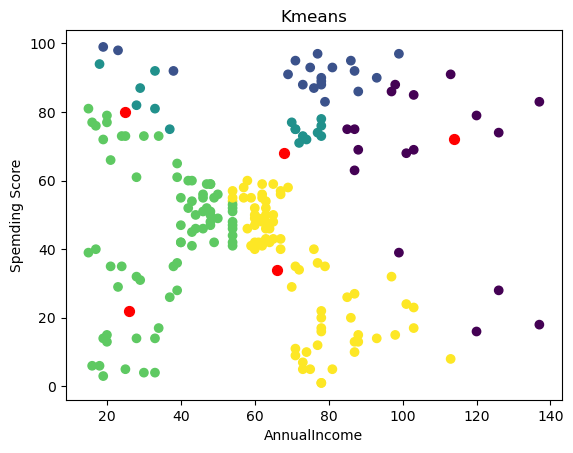

In [150]:
plt.scatter(X[:,0],X[:,1],c=label_s,cmap='viridis')
plt.scatter(centroids_s[:,0],centroids_s[:,1],marker='.',s=200,c='red')
plt.title('Kmeans')
plt.xlabel('AnnualIncome')
plt.ylabel('Spemding Score')
plt.show()

In [140]:
#using sklearn
X=df[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [141]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [143]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=5,random_state=45)
km.fit(X)

C:\Users\sriva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\sriva\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=45)

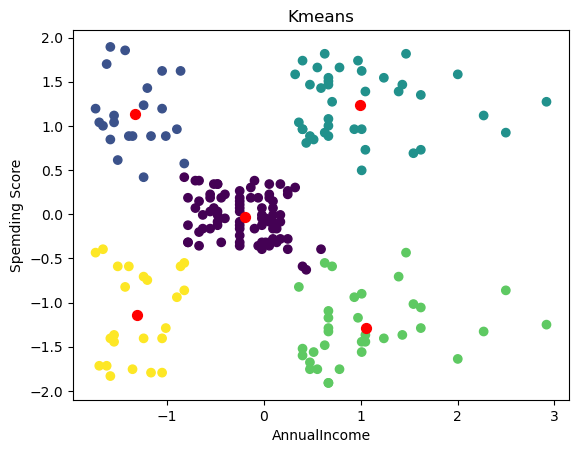

In [144]:
plt.scatter(X[:,0],X[:,1],c=km.labels_,cmap='viridis')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='.',s=200,c='red')
plt.title('Kmeans')
plt.xlabel('AnnualIncome')
plt.ylabel('Spemding Score')
plt.show()

## PCA

In [152]:
def PCA(X,n_comp):
    cov_matrix=np.cov(X,rowvar=False)
    
    eigenvalues,eigenvectors=np.linalg.eigh(cov_matrix)
    
    sort=np.argsort(eigenvalues)[::-1]#descendingorder
    sort_eval=eigenvalues[sort]
    sort_evec=eigenvectors[:,sort]
    
    principal_comp=sort_evec[:,:n_comp]
    projected_data=np.dot(X,principal_comp)
    
    return principal_comp,projected_data

import tensorflow as tf
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

#Flatten images 
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)
#normalize
x_train=x_train/255.0
x_test=x_test/255.0

n_comp=2
prin_comp,pro_data=PCA(x_train,n_comp)


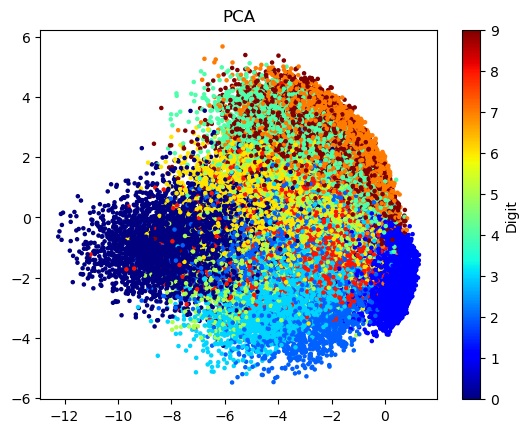

In [154]:
scatter=plt.scatter(pro_data[:,0],pro_data[:,1],c=y_train,s=5,cmap='jet')
plt.colorbar(scatter,label='Digit')
plt.title("PCA")
plt.show()

In [155]:
# ex6,ex9
